In [1]:
import pandas as pd
data= pd.read_csv("7000rpm.csv")
data

,Time,Front Bearing D,Front Bearing C,Inner Housing Front,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA,HousingB,Support,Room Temperature,Deformation,Speed
0,1,30.81,30.86,30.56,30.49,30.44,30.61,30.52,30.77,30.48,28.7,30.54,0.43890,7000
1,4,30.66,30.67,30.54,30.74,30.54,30.63,30.98,30.58,30.90,28.6,30.43,2.25535,7000
2,7,30.66,30.85,30.55,30.76,30.64,30.77,30.84,30.71,30.82,28.7,30.34,3.19860,7000
3,10,30.76,30.92,30.51,30.74,30.45,31.11,30.69,30.51,30.84,28.7,30.45,3.04670,7000
4,13,30.92,30.75,30.60,30.65,30.52,30.90,30.92,30.63,30.73,28.7,30.38,4.60950,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,23255,39.03,39.99,40.31,41.15,41.84,43.08,43.07,39.05,36.68,29.7,31.53,22.59270,7000
7790,23258,39.32,40.03,40.13,41.25,41.84,43.16,43.12,38.91,36.68,29.7,31.65,22.59760,7000
7791,23261,39.15,39.88,40.21,41.01,41.78,43.12,43.06,39.08,36.93,29.7,31.60,22.45185,7000
7792,23264,39.17,40.05,40.37,41.09,41.94,42.93,43.20,39.10,36.62,29.7,31.50,22.65095,7000


In [18]:
#將時間還有變形量移除
data2= pd.read_csv("7000rpm.csv",usecols=[4,5,6,7,8])
data2

,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA
0,30.49,30.44,30.61,30.52,30.77
1,30.74,30.54,30.63,30.98,30.58
2,30.76,30.64,30.77,30.84,30.71
3,30.74,30.45,31.11,30.69,30.51
4,30.65,30.52,30.90,30.92,30.63
...,...,...,...,...,...
7789,41.15,41.84,43.08,43.07,39.05
7790,41.25,41.84,43.16,43.12,38.91
7791,41.01,41.78,43.12,43.06,39.08
7792,41.09,41.94,42.93,43.20,39.10


In [19]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# to make this notebook's output identical at every run
np.random.seed(42)

In [20]:
x=data2
y=data.Deformation

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=335,criterion='mse', max_depth=10, min_samples_split=2, min_samples_leaf=5, max_features=5, random_state=42)
predict=model.fit(x_train,y_train).predict(x_test)
predict

array([21.97736011, 22.956933  , 22.77423737, ..., 22.81197711,
       22.791758  , 22.88790719])

In [23]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test,predict))

print(rmse)

0.22629578268819936


<function matplotlib.pyplot.show(*args, **kw)>

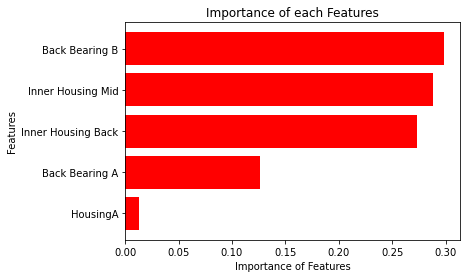

In [24]:
imp=model.feature_importances_
imp
import matplotlib.pyplot as plt
%matplotlib inline
names=data2.columns
zip(imp,names)
imp,names=zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center',color="red")
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of each Features')
plt.show

In [25]:
print("Traing Score:%f"%model.score(x_train,y_train))
print("Testing Score:%f"%model.score(x_test,y_test))

Traing Score:0.994228
Testing Score:0.993752


In [26]:
from sklearn.ensemble import RandomForestRegressor
predict_df=[]
model=RandomForestRegressor(n_estimators=300,criterion='mse', max_depth=10, min_samples_split=2, min_samples_leaf=5, max_features=5, random_state=42)
model.fit(x_train,y_train)
for m in range(0, len(x)):
    X_new = [x.iloc[m,:]]
    predict_df.append(model.predict(X_new))

In [27]:
import pandas as pd

#產出CSV檔                
def Output5000():   
    Result ='C://Users/User/Desktop/7000re.csv'
    df_SAMPLE = pd.DataFrame.from_dict( predict_df )
    df_SAMPLE.to_csv( Result  , index=False )
    print( '成功產出'+Result )

In [28]:
Output5000()

成功產出C://Users/User/Desktop/7000re.csv


In [17]:
import pandas as pd
data3= pd.read_csv("5001rpm.csv")
data4= pd.read_csv("5001rpm.csv",usecols=[1,2,3,4,5,6,7,8,9,10,11,13])
x2=data4
y2=data3.Deformation